In [9]:
# Trabalho com o MNIST - numeros manuscritos
from keras.datasets import mnist
from keras.utils import to_categorical
#Modelo da rede
from keras.models import Sequential
#Camadas que serão utilizadas
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


# Carregando o dataset separando os dados de treino e de teste
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

# Trazendo a função `to_categorical` para transformar os labels em one-hot encoding
y_treino_cat = to_categorical(y_treino)
y_teste_cat = to_categorical(y_teste)

# Normalização dos dados de entrada
x_treino_norm = x_treino/x_treino.max()
x_teste_norm = x_teste/x_teste.max()

# Reshape dos dados de entrada para adicionar o canal de cor
x_treino = x_treino.reshape(len(x_treino), 28, 28, 1)
x_treino_norm = x_treino_norm.reshape(len(x_treino_norm), 28, 28, 1)
x_teste = x_teste.reshape(len(x_teste), 28, 28, 1)
x_teste_norm = x_teste_norm.reshape(len(x_teste_norm), 28, 28, 1)


# Criação do modelo LeNet5
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
# Constroi o modelo
model.build()
# Exibe um resumo do modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 48)     │        38,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       307,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 84)             │        21,588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369,174 (1.41 MB)

 Trainable params: 369,174 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#Compila o modelo
from keras.optimizers import Adam
adam = Adam()
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer=adam)

# Realiza o treinamento do modelo
historico = model.fit(x_treino_norm, y_treino_cat, epochs=5, validation_split=0.2)

model.save('models/modelo_mnist.h5')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9056 - loss: 0.3003 - val_accuracy: 0.9854 - val_loss: 0.0467
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9852 - loss: 0.0448 - val_accuracy: 0.9868 - val_loss: 0.0450
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9907 - loss: 0.0306 - val_accuracy: 0.9843 - val_loss: 0.0501
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9937 - loss: 0.0195 - val_accuracy: 0.9880 - val_loss: 0.0450
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9950 - loss: 0.0158 - val_accuracy: 0.9905 - val_loss: 0.0332


Text(0, 0.5, 'accuracy')

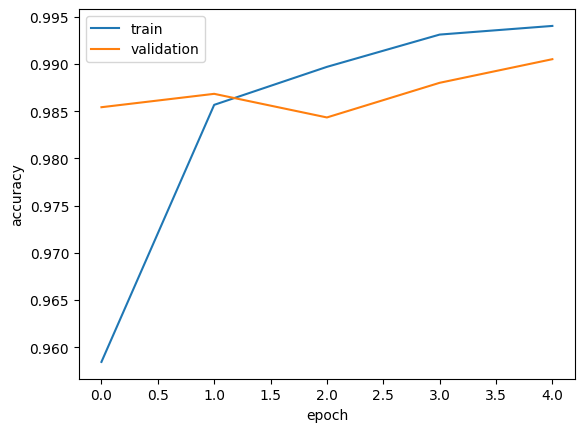

In [12]:
from matplotlib import pyplot as plt

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('accuracy')